In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn")

In [7]:
df = pd.read_csv("happiness-score/2020.csv")
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [8]:
df = df[["Regional indicator", 
         "Ladder score", 
         "Logged GDP per capita", 
         "Social support", 
         "Healthy life expectancy", 
         "Freedom to make life choices", 
         "Generosity", 
         "Perceptions of corruption"]]

In [6]:
# standardizing data
features = ["Logged GDP per capita", 
            "Social support", 
            "Healthy life expectancy", 
            "Freedom to make life choices", 
            "Generosity", 
            "Perceptions of corruption"]
x = df.loc[:, features].values

In [9]:
y = df.loc[:, ["Regional indicator"]]

In [10]:
x = StandardScaler().fit_transform(x)

In [11]:
pd.DataFrame(data=x, columns=features)

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.121827,1.202824,1.059782,1.412360,-0.296829,-3.079488
1,1.234325,1.216545,1.131096,1.431713,0.533799,-3.233871
2,1.406271,1.107965,1.372746,1.175261,0.796232,-2.459302
3,1.233121,1.370844,1.216031,1.409972,1.728302,-0.122627
4,1.496340,1.187598,1.244573,1.468391,0.985388,-2.691321
...,...,...,...,...,...,...
148,-2.229813,-4.041620,-2.735782,-1.213617,0.640919,0.908862
149,-1.415768,-2.212912,-0.475736,0.998540,0.462966,-3.147664
150,-1.193995,-0.376920,-1.254952,-0.612452,-0.379981,0.441679
151,-1.561674,-2.106583,-1.911303,-2.828318,0.205449,0.173524


In [12]:
# pca
pca = PCA(n_components=2)

In [13]:
principal_components = pca.fit_transform(x)

In [15]:
principal_df = pd.DataFrame(data=principal_components, columns = ["PC1", "PC2"])
principal_df

,PC1,PC2
0,-3.156674,1.076575
1,-3.332818,1.727894
2,-3.168921,1.406294
3,-2.548692,1.068620
4,-3.375464,1.742759
...,...,...
148,5.236166,1.363247
149,0.715032,3.010308
150,1.814518,-0.154577
151,3.942767,0.174391


In [18]:
final = pd.concat([principal_df, y], axis=1)

In [19]:
final

,PC1,PC2,Regional indicator
0,-3.156674,1.076575,Western Europe
1,-3.332818,1.727894,Western Europe
2,-3.168921,1.406294,Western Europe
3,-2.548692,1.068620,Western Europe
4,-3.375464,1.742759,Western Europe
...,...,...,...
148,5.236166,1.363247,Sub-Saharan Africa
149,0.715032,3.010308,Sub-Saharan Africa
150,1.814518,-0.154577,Sub-Saharan Africa
151,3.942767,0.174391,Sub-Saharan Africa


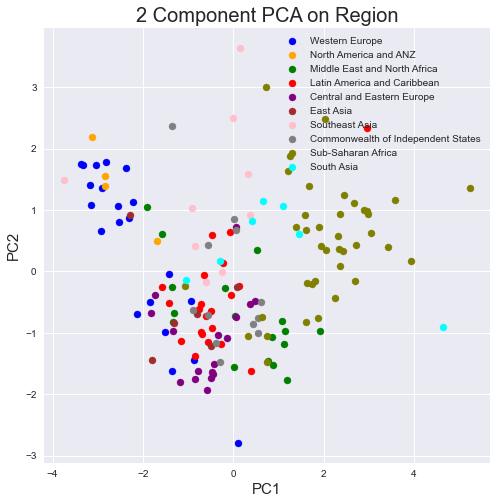

In [26]:
fig = plt.figure(figsize=(8,8))
plt.xlabel("PC1", fontsize=15)
plt.ylabel("PC2", fontsize=15)
plt.title("2 Component PCA on Region",fontsize=20)

regions = y["Regional indicator"].unique().tolist()
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]

for region, color in zip(regions, colors):
    indices_to_keep = final["Regional indicator"] == region
    plt.scatter(final.loc[indices_to_keep, "PC1"], 
                final.loc[indices_to_keep, "PC2"], 
                c=color, 
                s=50,
               label=region)
plt.legend()

In [24]:
len(y["Regional indicator"].unique())

10